# Linear Classification

importing libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

Importing dataset

In [2]:
from sklearn.datasets import load_breast_cancer
dataset = load_breast_cancer()

Checking the dataset

In [3]:
print('Type of dataset: ', type(dataset))
print('Keys of dataset: ', dataset.keys())

Type of dataset:  <class 'sklearn.utils.Bunch'>
Keys of dataset:  dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])


Size of dataset

In [4]:
print('Size of dataset: ', dataset.data.shape)
print('Feature names: ', dataset.feature_names)
print('Size of dataset target: ', dataset.target.shape)
print('Target names: ', dataset.target_names)

Size of dataset:  (569, 30)
Feature names:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Size of dataset target:  (569,)
Target names:  ['malignant' 'benign']


Splitting data into train and test sets

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(dataset.data, dataset.target, test_size = 0.2)
N, D = X_train.shape

Scaling the data

In [6]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

Fitting model on training data

In [7]:
model = tf.keras.models.Sequential()
model.add(tf.keras.Input(shape=(D,)))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # 1 because we need one dimentional output (No = 0 OR Yes = 1)

model.compile(optimizer="Adam", loss="binary_crossentropy", metrics=["accuracy"])

r = model.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), epochs = 100)

print("Train_score: ", model.evaluate(X_train, y_train))
print("Test_score: ", model.evaluate(X_test, y_test))

Epoch 1/100
15/15 [==============================] - 1s 37ms/step - loss: 0.7172 - accuracy: 0.5784 - val_loss: 0.6646 - val_accuracy: 0.6579
Epoch 2/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6615 - accuracy: 0.6346 - val_loss: 0.5896 - val_accuracy: 0.7193
Epoch 3/100
15/15 [==============================] - 0s 5ms/step - loss: 0.5550 - accuracy: 0.7625 - val_loss: 0.5285 - val_accuracy: 0.7719
Epoch 4/100
15/15 [==============================] - 0s 4ms/step - loss: 0.5140 - accuracy: 0.7740 - val_loss: 0.4780 - val_accuracy: 0.7895
Epoch 5/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4709 - accuracy: 0.8104 - val_loss: 0.4345 - val_accuracy: 0.8333
Epoch 6/100
15/15 [==============================] - 0s 5ms/step - loss: 0.4275 - accuracy: 0.8496 - val_loss: 0.3994 - val_accuracy: 0.8333
Epoch 7/100
15/15 [==============================] - 0s 4ms/step - loss: 0.4093 - accuracy: 0.8618 - val_loss: 0.3682 - val_accuracy: 0.8684
Epoch 8/100


Plotting what's returned by model.fit

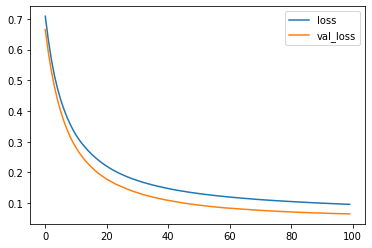

In [8]:
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label = 'val_loss')
plt.legend()

Plotting the accuracy too.

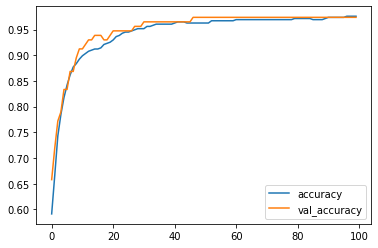

In [9]:
plt.plot(r.history['accuracy'], label = 'accuracy')
plt.plot(r.history['val_accuracy'], label = 'val_accuracy')
plt.legend()

Making predictions

In [10]:
y_pred = model.predict(X_test)
y_pred = y_pred > 0.5

Confusion Matrix and Accuracy score

In [11]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [12]:
print(cm)

[[41  0]
 [ 3 70]]
